# Context

At first, let's import data and take a look at the dataset.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style="whitegrid", context="talk", palette = "YlGnBu")
df = pd.read_csv('train.csv', index_col = 'PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [3]:
df.shape

(100000, 11)

The dataset contains 11 variables and 100000 observations

# Data quality assessment

Let's check which datatapes the dataset includes and if the dataset has null values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


* There are 3 data types in the dataset: int64, object, and float64, which are consistent with which data is supposed to be in each column.
* The `Age`, `Ticket`, `Fare`, `Cabin`, and `Embarked` columns have null values.

Let's fill null values for `Ticket`, `Cabin`, and `Embarked` with 'Unknown', for `Age`, `Fare` with mean values. 

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Ticket'] = df['Ticket'].fillna('Unknown')
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       100000 non-null  float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    100000 non-null  object 
 8   Fare      100000 non-null  float64
 9   Cabin     100000 non-null  object 
 10  Embarked  100000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


Next, let's perform sanity checks for the `Age`, `SibSp`, `Parch`, and `Fare` columns, as they contain quantitative variables.

In [6]:
age_max = df['Age'].max()
age_min =  df['Age'].min()
print('max age is', age_max)
print('min age is', age_min)

max age is 87.0
min age is 0.08


The `Age` column has no outliers, because max age is reasonable and min age is fractional when less than 1.

In [7]:
sibsp_max = df['SibSp'].max()
sibsp_min = df['SibSp'].min()
print('max # of siblings / spouses is', sibsp_max)
print('min # of siblings / spouses is', sibsp_min)

max # of siblings / spouses is 8
min # of siblings / spouses is 0


In [8]:
parch_max = df['Parch'].max()
parch_min = df['Parch'].min()
print('max # of parents / children is', parch_max)
print('min # of parents / children is', parch_min)

max # of parents / children is 9
min # of parents / children is 0


The `SibSp` and `Parch` also have no outliers, as the maximum amd minimum number of siblings / spouses and parents / children are reasonable.

In [9]:
fare_max = df['Fare'].max()
fare_min = df['Fare'].min()
print('max fare is', fare_max)
print('min fare is', fare_min)

max fare is 744.66
min fare is 0.68


The `Fare` column also considered to have sane values according to maximum and minimum fare.

Next let's add two columns with last names and first names of passengers.

In [10]:
df = pd.concat([df, df['Name'].str.split(',', expand=True)], axis=1)
df = df.rename(columns={0:'LastName', 1: 'FirstName'})

# Data exploration

### Exploration of each individual variable

Text(0, 0.5, 'Number of Passengers')

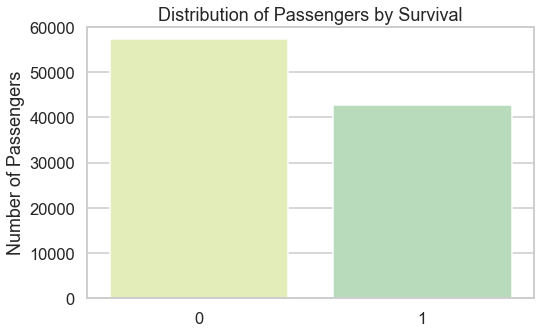

In [11]:
survived_cnt = df['Survived'].value_counts()
plt.figure(figsize=(8,5))
plt.title("Distribution of Passengers by Survival")
sns.barplot(x = survived_cnt.index, y = survived_cnt)
plt.ylabel("Number of Passengers")

Text(0, 0.5, 'Number of Passengers')

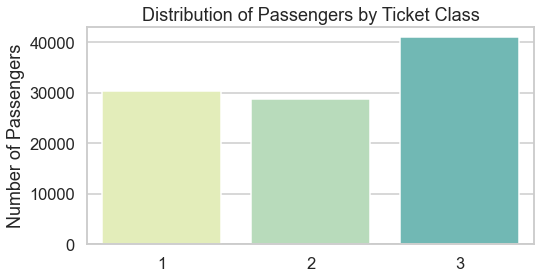

In [12]:
pclass_cnt = df['Pclass'].value_counts()
plt.figure(figsize=(8,4))
plt.title("Distribution of Passengers by Ticket Class")
sns.barplot(x = pclass_cnt.index, y = pclass_cnt)
plt.ylabel("Number of Passengers")

Text(0, 0.5, 'Number of Passengers')

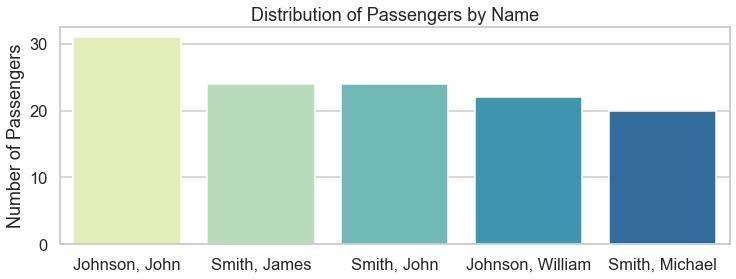

In [13]:
fullname_cnt = df['Name'].value_counts().sort_values(ascending=False).head(5)
plt.figure(figsize=(12,4))
plt.title("Distribution of Passengers by Name")
sns.barplot(x = fullname_cnt.index, y = fullname_cnt)
plt.ylabel("Number of Passengers")

Text(0, 0.5, 'Number of Passengers')

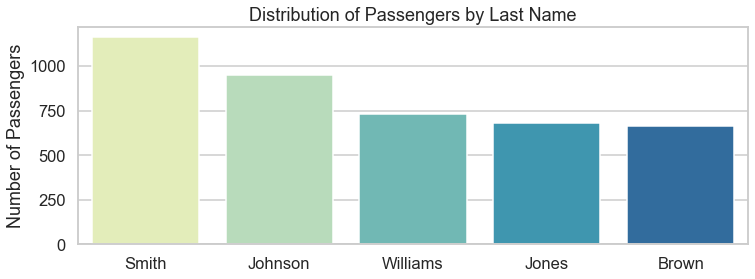

In [14]:
lastname_cnt = df['LastName'].value_counts().sort_values(ascending=False).head(5)
plt.figure(figsize=(12,4))
plt.title("Distribution of Passengers by Last Name")
sns.barplot(x = lastname_cnt.index, y = lastname_cnt)
plt.ylabel("Number of Passengers")

Text(0, 0.5, 'Number of Passengers')

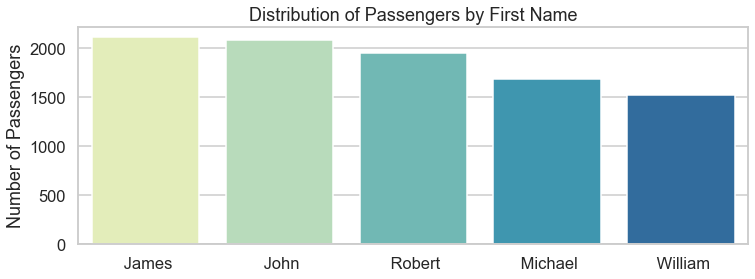

In [15]:
firstname_cnt = df['FirstName'].value_counts().sort_values(ascending=False).head(5)
plt.figure(figsize=(12,4))
plt.title("Distribution of Passengers by First Name")
sns.barplot(x = firstname_cnt.index, y = firstname_cnt)
plt.ylabel("Number of Passengers")

Text(0, 0.5, 'Number of Passengers')

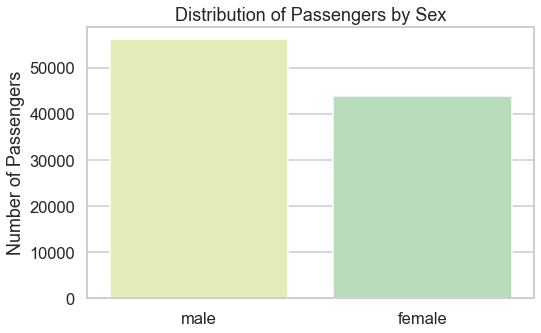

In [16]:
sex_cnt = df['Sex'].value_counts()
plt.figure(figsize=(8,5))
plt.title("Distribution of Passengers by Sex")
sns.barplot(x = sex_cnt.index, y = sex_cnt)
plt.ylabel("Number of Passengers")

In [17]:
sex_cnt

male      56114
female    43886
Name: Sex, dtype: int64

<AxesSubplot:title={'center':'Distribution of Passengers by Age'}, xlabel='Age', ylabel='Count'>

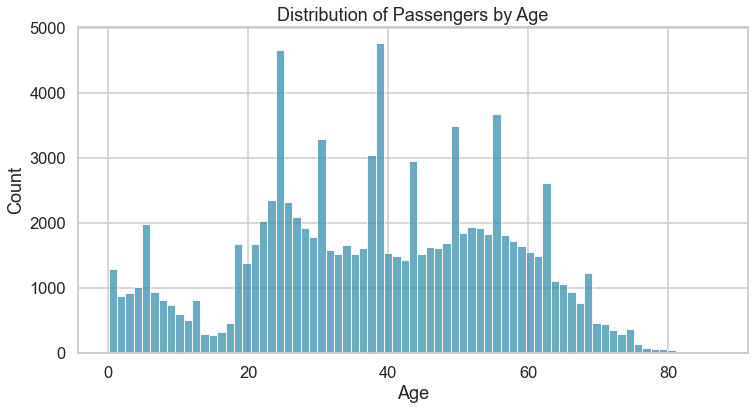

In [18]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Passengers by Age")
sns.histplot(data=df, x='Age', stat = 'count', color = '#388FAD')

For the `Age` column let's also calculate central tendency measures.

In [19]:
CentralTendency_Age = {}
CentralTendency_Age['Mean'] = df['Age'].mean()
CentralTendency_Age['Median'] = df['Age'].median()
CentralTendency_Age['Mode'] = df['Age'].mode()[0]
CentralTendency_Age

{'Mean': 38.35547214294454,
 'Median': 38.35547214294576,
 'Mode': 38.35547214294576}

Text(0, 0.5, 'Number of Passengers')

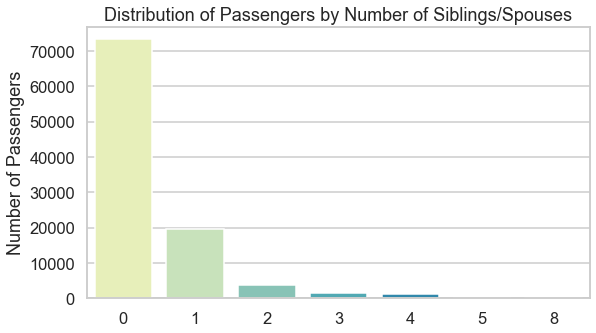

In [20]:
sibsp_cnt = df['SibSp'].value_counts()
plt.figure(figsize=(9,5))
plt.title("Distribution of Passengers by Number of Siblings/Spouses")
ax = sns.barplot(x = sibsp_cnt.index, y = sibsp_cnt, palette = "YlGnBu")
plt.ylabel("Number of Passengers")

Text(0, 0.5, 'Number of Passengers')

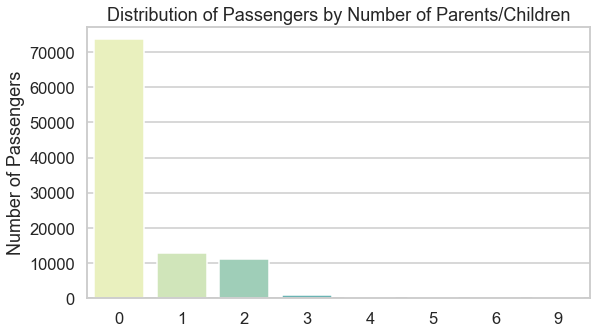

In [21]:
parch_cnt = df['Parch'].value_counts()
plt.figure(figsize=(9,5))
plt.title("Distribution of Passengers by Number of Parents/Children")
ax = sns.barplot(x = parch_cnt.index, y = parch_cnt, palette = "YlGnBu")
plt.ylabel("Number of Passengers")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'A/5 '),
  Text(1, 0, 'C.A. '),
  Text(2, 0, 'SC/PARIS '),
  Text(3, 0, 'SOTON/O.Q. '),
  Text(4, 0, 'SC '),
  Text(5, 0, 'W./C. '),
  Text(6, 0, 'A/5. '),
  Text(7, 0, 'W.E.P. '),
  Text(8, 0, 'CA '),
  Text(9, 0, 'STON/O2. '),
  Text(10, 0, 'PP '),
  Text(11, 0, 'CA. '),
  Text(12, 0, 'LP '),
  Text(13, 0, 'A/4 '),
  Text(14, 0, 'SOTON/OQ ')])

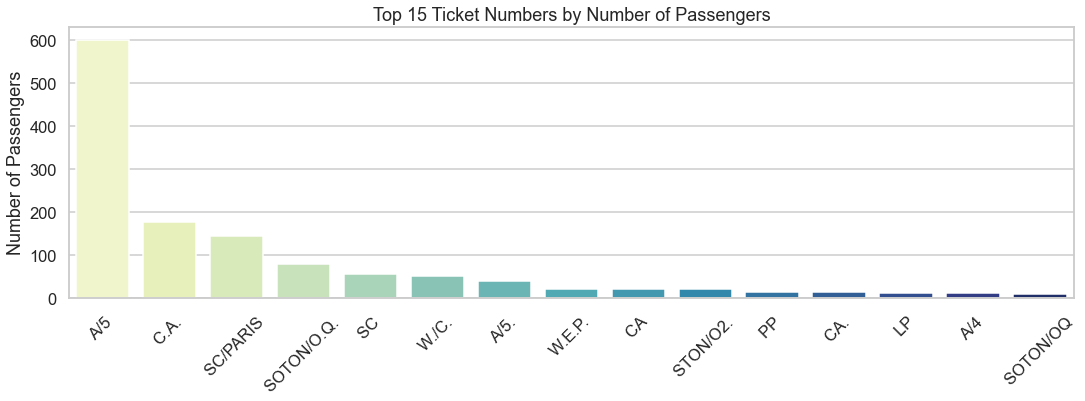

In [22]:
ticket_cnt = df.loc[df['Ticket']!='Unknown','Ticket'].value_counts().sort_values(ascending=False).head(15)
plt.figure(figsize=(18,5))
plt.title("Top 15 Ticket Numbers by Number of Passengers")
sns.barplot(x = ticket_cnt.index, y = ticket_cnt, palette = "YlGnBu")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=45)

<AxesSubplot:title={'center':'Distribution of Passengers by Fare'}, xlabel='Fare', ylabel='Count'>

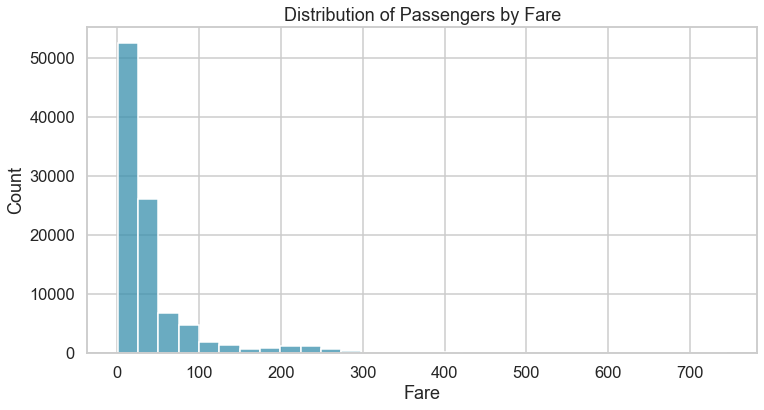

In [23]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Passengers by Fare")
sns.histplot(data=df, x='Fare', stat = 'count', color = '#388FAD', bins = 30)

For the `Fare` column let's also calculate central tendency measures.

In [24]:
CentralTendency_Fare = {}
CentralTendency_Fare['Mean'] = df['Fare'].mean()
CentralTendency_Fare['Median'] = df['Fare'].median()
CentralTendency_Fare['Mode'] = df['Fare'].mode()[0]
CentralTendency_Fare

{'Mean': 43.92933040273953, 'Median': 24.49, 'Mode': 43.92933040273962}

Text(0, 0.5, 'Number of Passengers')

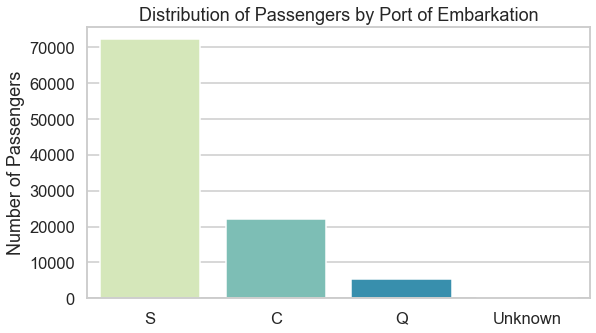

In [25]:
embarked_cnt = df['Embarked'].value_counts()
plt.figure(figsize=(9,5))
plt.title("Distribution of Passengers by Port of Embarkation")
sns.barplot(x = embarked_cnt.index, y = embarked_cnt, palette = "YlGnBu")
plt.ylabel("Number of Passengers")

Сonclusions from exploration of each individual variable:
* More passengers died than survived.
* The majority of passengers were in 3rd class. The minority of passengers were in 2nd class.
* The most popular full name among passengers is John Johnson. The most popular last name among passengers is Smith. The most popular first name among passengers is James.
* There were more male passengers than female.
* The majority of passengers were in age between 20 and 60. The mean, median, and mode for age is about 38.35.
* The range of the `SibSp` column is from 0 to 8. The most passengers had no siblings or spouses on the ship.
* The range of the `Parch` column is from 0 to 9. The most passengers had no parents or children on the ship.
* The most popular ticket number is A/5, about 600 passengers had it.
* The most passengers had passenger fare less than 100. 
* The majority of passengers were embarked in Southampton.

### Exploring the relationships between variables

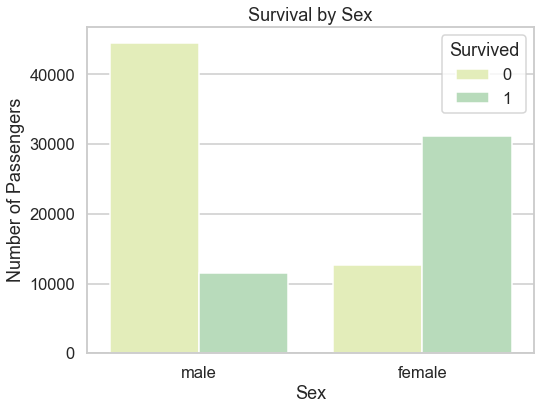

In [26]:
fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(2, 2)
ax_sex_survived = fig.add_subplot(gs[:2,:2])
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax_sex_survived)
plt.title("Survival by Sex")
plt.ylabel("Number of Passengers")
plt.show()

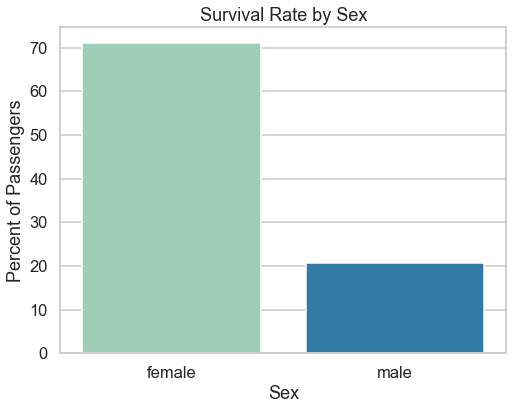

In [27]:
passenger_sex =df[['Sex', 'Survived']].groupby('Sex')['Survived'].value_counts().sort_index().unstack().fillna(0)
passenger_sex['Survival rate'] = passenger_sex[1] / (passenger_sex[0] + passenger_sex[1]) * 100
plt.figure(figsize=(8, 6))
plt.title("Survival Rate by Sex")
sns.barplot(x = passenger_sex.index, y = passenger_sex['Survival rate'], palette = "YlGnBu")
plt.ylabel("Percent of Passengers")
plt.show()

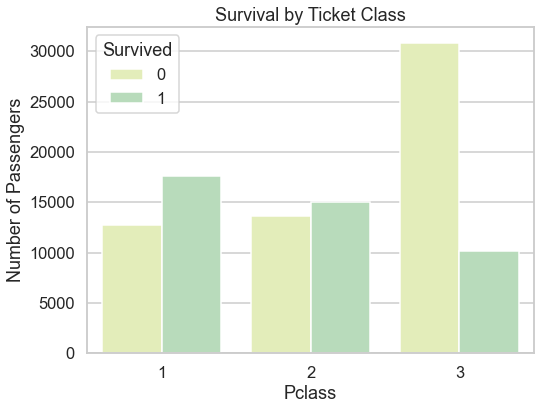

In [28]:
fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(2, 2)
ax_pclass_survived = fig.add_subplot(gs[:2,:2])
sns.countplot(x='Pclass', hue='Survived', data=df, ax=ax_pclass_survived)
plt.title("Survival by Ticket Class")
plt.ylabel("Number of Passengers")
plt.show()

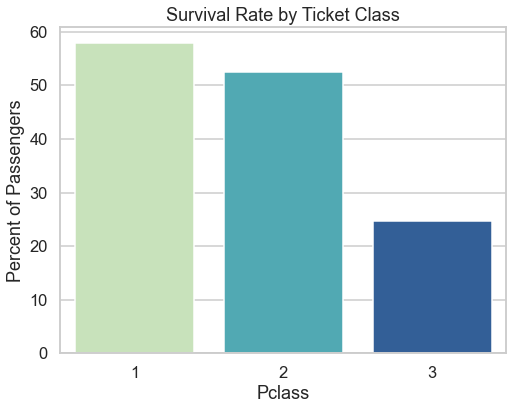

In [29]:
passenger_pclass =df[['Pclass', 'Survived']].groupby('Pclass')['Survived'].value_counts().sort_index().unstack().fillna(0)
passenger_pclass['Survival rate'] = passenger_pclass[1] / (passenger_pclass[0] + passenger_pclass[1]) * 100
plt.figure(figsize=(8, 6))
plt.title("Survival Rate by Ticket Class")
sns.barplot(x = passenger_pclass.index, y = passenger_pclass['Survival rate'], palette = "YlGnBu")
plt.ylabel("Percent of Passengers")
plt.show()

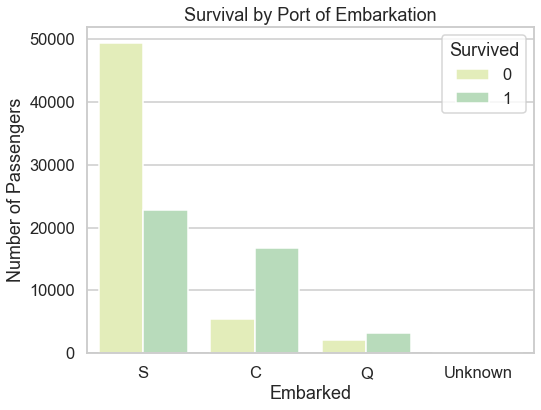

In [30]:
fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(2, 2)
ax_embarked_survived = fig.add_subplot(gs[:2,:2])
sns.countplot(x='Embarked', hue='Survived', data=df, ax=ax_embarked_survived)
plt.title("Survival by Port of Embarkation")
plt.ylabel("Number of Passengers")
plt.show()

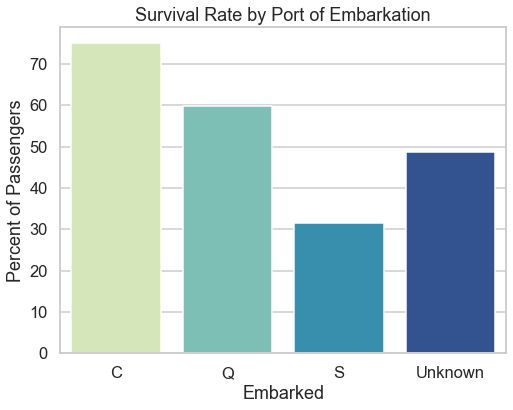

In [31]:
passenger_embarked =df[['Embarked', 'Survived']].groupby('Embarked')['Survived'].value_counts().sort_index().unstack().fillna(0)
passenger_embarked['Survival rate'] = passenger_embarked[1] / (passenger_embarked[0] + passenger_embarked[1]) * 100
plt.figure(figsize=(8, 6))
plt.title("Survival Rate by Port of Embarkation")
sns.barplot(x = passenger_embarked.index, y = passenger_embarked['Survival rate'], palette = "YlGnBu")
plt.ylabel("Percent of Passengers")
plt.show()

In [32]:
def age_groups(num):
    for i in range(1, 100):
        if num < 10*i :  
            return f'{(i-1) * 10} - {i*10}'

df['Age groups'] = df['Age'].apply(age_groups)
passenger_age = df[['Age groups', 'Survived']].groupby('Age groups')['Survived'].value_counts().sort_index().unstack().fillna(0)
passenger_age['Survival rate'] = passenger_age[1] / (passenger_age[0] + passenger_age[1]) * 100

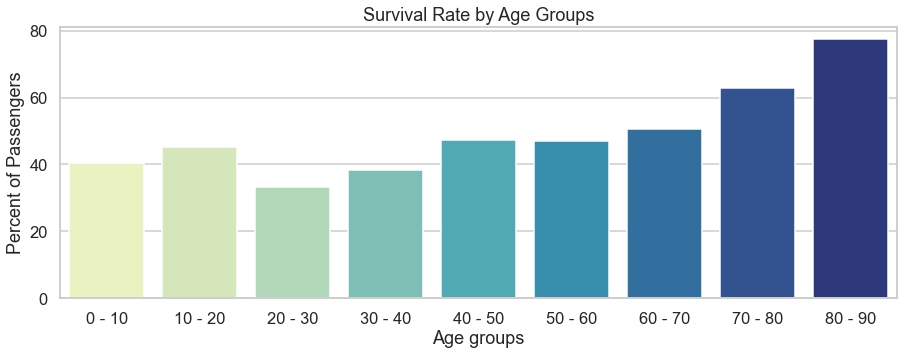

In [33]:
plt.figure(figsize=(15,5))
plt.title("Survival Rate by Age Groups")
sns.barplot(x = passenger_age.index, y = passenger_age['Survival rate'], palette = "YlGnBu")
plt.ylabel("Percent of Passengers")
plt.show()

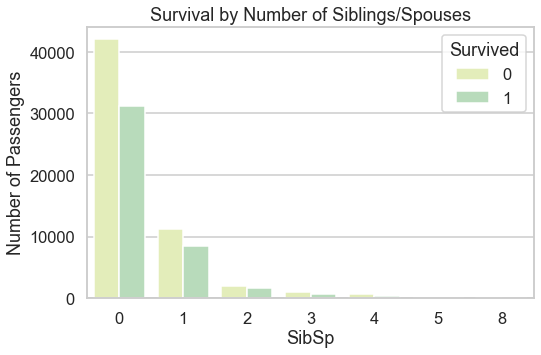

In [34]:
fig = plt.figure(figsize=(8, 5))
gs = fig.add_gridspec(2, 2)
ax_sibsp_survived = fig.add_subplot(gs[:2,:2])
sns.countplot(x='SibSp', hue='Survived', data=df, ax=ax_sibsp_survived)
plt.title("Survival by Number of Siblings/Spouses")
plt.ylabel("Number of Passengers")
plt.show()

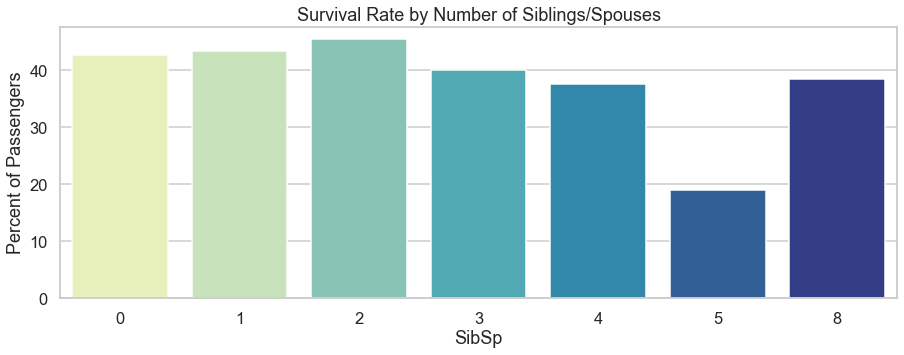

In [35]:
passenger_sibsp =df[['SibSp', 'Survived']].groupby('SibSp')['Survived'].value_counts().sort_index().unstack().fillna(0)
passenger_sibsp['Survival rate'] = passenger_sibsp[1] / (passenger_sibsp[0] + passenger_sibsp[1]) * 100
plt.figure(figsize=(15,5))
plt.title("Survival Rate by Number of Siblings/Spouses")
sns.barplot(x = passenger_sibsp.index, y = passenger_sibsp['Survival rate'], palette = "YlGnBu")
plt.ylabel("Percent of Passengers")
plt.show()

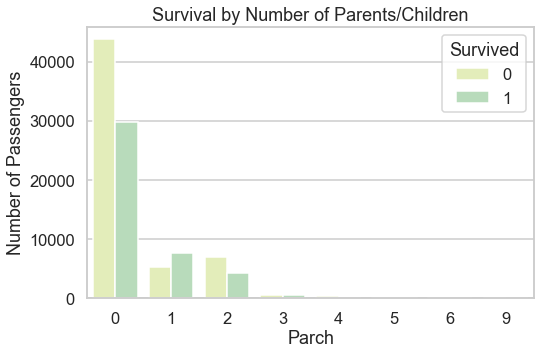

In [36]:
fig = plt.figure(figsize=(8, 5))
gs = fig.add_gridspec(2, 2)
ax_parch_survived = fig.add_subplot(gs[:2,:2])
sns.countplot(x='Parch', hue='Survived', data=df, ax=ax_parch_survived)
plt.title("Survival by Number of Parents/Children")
plt.ylabel("Number of Passengers")
plt.show()

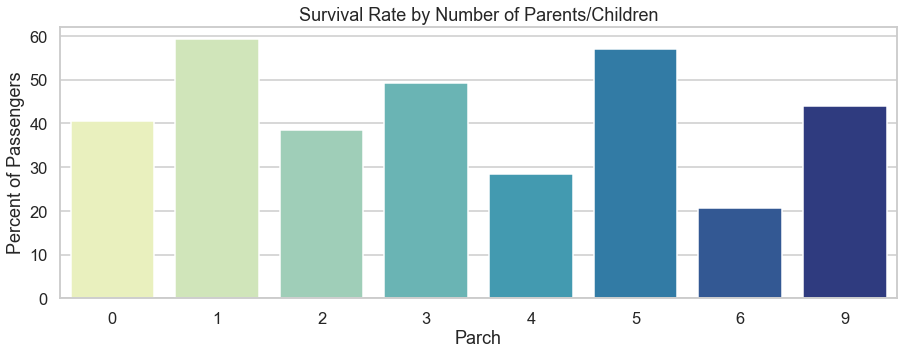

In [37]:
passenger_parch =df[['Parch', 'Survived']].groupby('Parch')['Survived'].value_counts().sort_index().unstack().fillna(0)
passenger_parch['Survival rate'] = passenger_parch[1] / (passenger_parch[0] + passenger_parch[1]) * 100
plt.figure(figsize=(15,5))
plt.title("Survival Rate by Number of Parents/Children")
sns.barplot(x = passenger_parch.index, y = passenger_parch['Survival rate'], palette = "YlGnBu")
plt.ylabel("Percent of Passengers")
plt.show()

Let's find out what is mean age for each value of variables.

In [38]:
mean_age_by_class = df.loc[:,['Pclass', 'Age']].groupby('Pclass').mean('Age')
mean_age_by_class

,Age
Pclass,
1,44.570767
2,38.622122
3,33.574125


In [39]:
mean_age_by_sex = df.loc[:,['Sex', 'Age']].groupby('Sex').mean('Age')
mean_age_by_sex

,Age
Sex,
female,39.991574
male,37.075899


In [40]:
mean_age_by_embarked = df.loc[:,['Embarked', 'Age']].groupby('Embarked').mean('Age')
mean_age_by_embarked

,Age
Embarked,
C,41.735379
Q,49.671516
S,36.461406
Unknown,39.426844


Let's find out what is mean fare for each value of variables.

In [41]:
mean_fare_by_class = df.loc[:,['Pclass', 'Fare']].groupby('Pclass').mean('Fare')
mean_fare_by_class

,Fare
Pclass,
1,92.588823
2,25.782618
3,20.647787


In [42]:
mean_fare_by_sex = df.loc[:,['Sex', 'Fare']].groupby('Sex').mean('Fare')
mean_fare_by_sex

,Fare
Sex,
female,55.210185
male,35.106726


In [43]:
mean_fare_by_embarked = df.loc[:,['Embarked', 'Fare']].groupby('Embarked').mean('Fare')
mean_fare_by_embarked

,Fare
Embarked,
C,71.507992
Q,73.341703
S,33.213691
Unknown,50.309437


Сonclusions from exploration of the relationships between variables:
* There are more females among survivors than males. More than 70% of females survived, while only about 20% of males survived.
* The most survivors were in 1st class, the least - in 3rd.
* The largest rate of survivors were embarked in Cherbourg. The smallest rate - in Southampton.
* The passengers at age between 70 and 90 had the highest survival rate. The passengers at age between 20 and 30 had the lowest survival rate.
* The passengers who had 2 siblings/spouses abroad had the highest survival rate. The passengers who had 5 siblings/spouses abroad had the lowest survival rate.
* The passengers who had 1 parent/child abroad had the highest survival rate. The passengers who had 6 parents/children abroad had the lowest survival rate.

# Summary

The list of hypotheses that come up during EDA:
* There are more chances to survive for passengers in 80-90 age group than other .
* There are more chances to survive for passengers who have siblings/spouses abroad than passengers who have no siblings/spouses abroad.
* There are more chances to survive for passengers who have parents/children abroad than passengers who have no parents/children abroad.